# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


### Simulations for Exercise 08.2

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
x0=0
delta=3.5
nstep=150000
nblock=30
mu=0.0
sigma=0.0
delta_opt=1

n=16
energy=np.zeros((n,n))

mus=np.linspace(0.7, 1.0, n)
sigmas=np.linspace(0.5, 0.8, n)

for i in range(n):
    mu=mus[i]
    
    for j in range(n):
        sigma=sigmas[j]

        data=str(x0)+"\n"+str(delta)+"\n"+str(nstep)+"\n"+str(nblock)+"\n"+str(mu)+"\n"+str(sigma)+"\n"+str(delta_opt)+"\n\n  ReadInput >> x0; \n  ReadInput >> delta; \n  ReadInput >> nstep; \n  ReadInput >> nblock; \n  ReadInput >> mu;\n  ReadInput >> sigma;\n  ReadInput >> delta_opt;"
        indat=open("input.dat", "w")
        indat.write(data)
        indat.close()

        os.system(".\main.exe")

        energy[i][j]= np.loadtxt("energy.out", skiprows=nblock-1, usecols=(1), unpack=True)

print ("Finished!")

Finished!


In [5]:
oute=open("params_energy.out", "w+")

for i in range(n):   
    for j in range(n):
        dataout=str(mus[i])+"\t"+str(sigmas[j])+"\t"+str(energy[i][j])+"\n"
        oute.write(dataout)

oute.close()

print ("Finished")

Finished


In [6]:
i_m,i_s=np.unravel_index(np.argmin(energy, axis=None),energy.shape)
en_min=energy[i_m][i_s]

mu=mus[i_m]
sigma=sigmas[i_s]

print ("μ = ", mu)
print ("σ = ", sigma)
print ("E_min = ", en_min)

μ =  0.78
σ =  0.62
E_min =  -0.444009


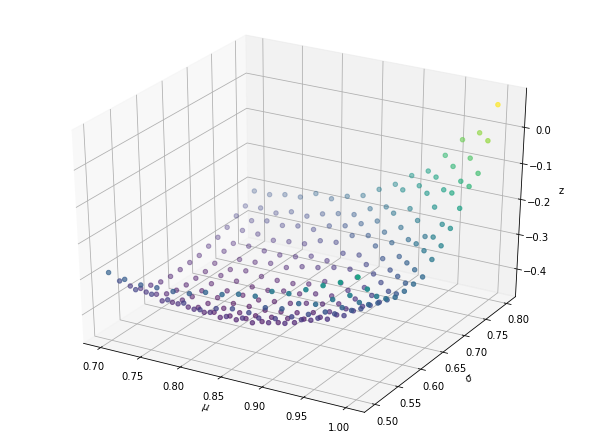

In [12]:
from mpl_toolkits.mplot3d import Axes3D

mu, sigma, energy = np.loadtxt('results/params_energy.out', usecols=(0,1,2), unpack=True)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(mu, sigma, energy, c=energy, cmap='viridis')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('z')
plt.show()